<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/Penguin_vs_Knights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [ ]:
knight0 = 14
peng0 = 200
knightFinal = 0
pengFinal = 16
timeend = 78-12 #seconds

The solver successfully reached the end of the integration interval.
nfev =  32


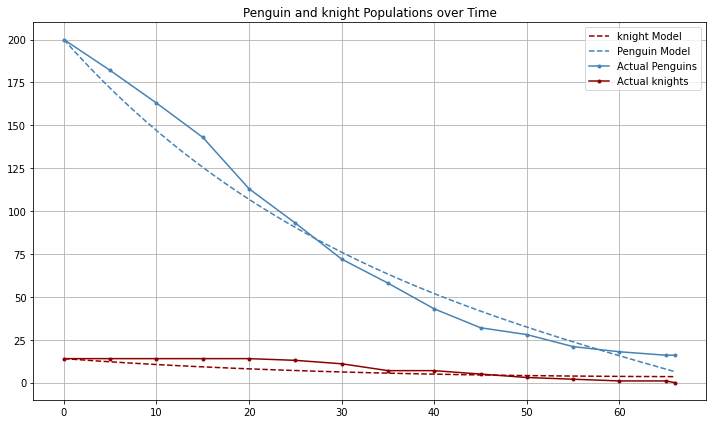

beta = 0.002
alpha = 0.435


In [ ]:
#p1 = knight, p2 = pengbattletime = timeend
penglosses = peng0 - pengFinal 
knightlosses = knight0 - knightFinal
beta = 0.002 #knight loss per peng
alpha =  0.435#0.435 #peng loss per knight

def f(t,yvec):
  knightpop = yvec[0]  # knightica 
  pengpop = yvec[1] #pengan
  return [-beta*pengpop, -alpha*knightpop]

def knightloss(t,yvec):
  return yvec[0]

def pengloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [knight0, peng0] 
t = np.linspace(0, TMAX, num=211)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(knightloss,pengloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
knight = ivp.y[0]
peng = ivp.y[1]

#actual
pdata = np.array([200,182,163,143,113,93,72,58,43,32,28,21,18,16,16])
kdata = np.array([14,14,14,14,14,13,11,7,7,5,3,2,1,1,0])
tdata = np.array([12,17,22,27,32,37,42,47,52,57,62,67,72,77,78])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 12

plt.figure(figsize=(10,6))
plt.plot(t, knight,'--',color='darkred',label='knight Model')
plt.title('Penguin and knight Populations over Time')
plt.plot(t, peng,'r--',color='steelblue',label='Penguin Model')
plt.plot(tdata,pdata,'.-',color='steelblue',label="Actual Penguins")
plt.plot(tdata,kdata,'.-',color='darkred',label='Actual knights')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f'beta = {beta}')
print(f'alpha = {alpha}')

In [ ]:
#Error Finding
error = 0
error += abs(knight[196] - kdata[14])
error += abs(peng[196] - pdata[14])
error += abs(knight[140] - kdata[10])
error += abs(peng[140] - pdata[10])
error += abs(knight[70] - kdata[5])
error += abs(peng[70] - pdata[5] )
print(error)

36.07266517992594


Lowest Errors so far: 

beta = 0.002,
alpha = 0.435 : Error 36.07266517992594